**This notebook extracts last month's top and rising topics on recipes from Google Trends**

In [ ]:
!pip install pytrends

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import gc
import pytrends

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
#trending topics

from pytrends.request import TrendReq
pytrend = TrendReq(tz=360) #geo = 'UK',

In [ ]:
# build the payload
pytrend.build_payload(kw_list=['Metaverse'], timeframe='today 1-m') #, geo='US'

# get related queries
df_rq = pytrend.related_queries()

# display df_rq
print(df_rq)

{'Metaverse': {'top':                          query  value
0           facebook metaverse    100
1             crypto metaverse     64
2               metaverse coin     61
3                the metaverse     52
4            what is metaverse     50
5                         meta     47
6            metaverse meaning     46
7              metaverse stock     32
8         metaverse zuckerberg     25
9    metaverse mark zuckerberg     20
10             mark zuckerberg     20
11             metaverse coins     19
12                         nft     15
13               meta facebook     15
14               metaverse nft     15
15             metaverse nedir     14
16       what is the metaverse     14
17             metaverse token     13
18              mana metaverse      9
19              metaverse game      9
20           metaverse company      9
21      metaverse crypto coins      9
22  what is metaverse facebook      9
23               metaverse etf      8
24       facebook to metaver

In [ ]:
kw_list = ['Metaverse'] 

In [ ]:
#build payload: define timeframe, country

pytrend.build_payload(kw_list=kw_list, timeframe='today 1-m', gprop='') #geo='GB-ENG' #'now 7-d'

In [ ]:
# Related Topics, returns a dictionary of dataframes: use to build network
topics = pytrend.related_topics()
topics_rising = topics['Metaverse']['rising']
topics_top = topics['Metaverse']['top']

In [ ]:
topics_rising.head()

,value,formattedValue,link,topic_mid,topic_title,topic_type
0,103550,Breakout,/trends/explore?q=/m/0f_z7&date=today+1-m,/m/0f_z7,Name change,Topic
1,86400,Breakout,/trends/explore?q=/g/11gk74sk03&date=today+1-m,/g/11gk74sk03,"CoinMarketCap OpCo, LLC",Company
2,73050,Breakout,/trends/explore?q=/m/077hh&date=today+1-m,/m/077hh,Shiba Inu,Dog breed
3,55800,Breakout,/trends/explore?q=/m/0553b&date=today+1-m,/m/0553b,Meta element,Topic
4,31900,Breakout,/trends/explore?q=/m/07tn5&date=today+1-m,/m/07tn5,Unidentified flying object,Topic


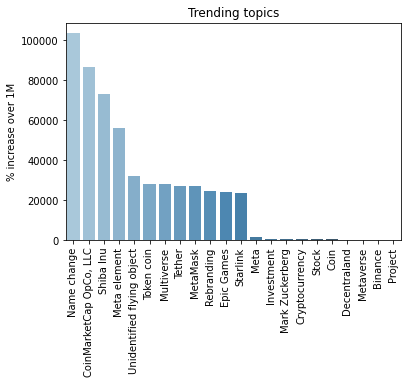

In [ ]:
ax = sns.barplot(x="topic_title", y="value", data=topics_rising,
                 palette="Blues_d")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.set_xlabel('')
ax.set_ylabel('% increase over 1M')
ax.set_title('Trending topics')
plt.show()

In [ ]:
# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()
related_rising = related_queries['Metaverse']['rising']

In [1]:
related_top = related_queries['Metaverse']['top']

In [ ]:
topics_top.head(5)

,value,formattedValue,hasData,link,topic_mid,topic_title,topic_type
0,100,100,True,/trends/explore?q=/m/054_cb&date=today+1-m,/m/054_cb,Metaverse,Topic
1,9,9,True,/trends/explore?q=/m/0242l&date=today+1-m,/m/0242l,Coin,Topic
2,9,9,True,/trends/explore?q=/m/0vpj4_b&date=today+1-m,/m/0vpj4_b,Cryptocurrency,Topic
3,6,6,True,/trends/explore?q=/m/077mq&date=today+1-m,/m/077mq,Stock,Topic
4,4,4,True,/trends/explore?q=/m/086dny&date=today+1-m,/m/086dny,Mark Zuckerberg,Chief Executive Officer of Facebook


In [ ]:
over_time = pytrend.interest_over_time()

In [ ]:
from pytrends import dailydata

df = dailydata.get_daily_data('Metaverse', 2021, 10, 2021, 11) #, geo = 'US'

#print(df)

Metaverse:2021-10-01 2021-10-31
Metaverse:2021-11-01 2021-11-30


In [ ]:
df.tail()

,Metaverse_unscaled,Metaverse_monthly,isPartial,scale,Metaverse
date,,,,,
2021-11-10,81,26,False,0.26,21.06
2021-11-11,79,26,False,0.26,20.54
2021-11-12,85,29,False,0.29,24.65
2021-11-13,74,24,False,0.24,17.76
2021-11-14,75,24,False,0.24,18.00


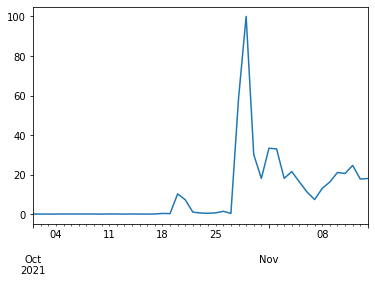

In [ ]:
df.Metaverse.plot()
plt.xlabel('')
plt.show()